# Machine Learning Algorithms

## 2.	Decision Trees and Ensemble Methods
- Model is biased if it systematically under or over predicts the target variable (e.g. linear regr on quadratic data)
- Model has high variance if it can't generalize- i.e. how much our prediction would change if we trained it on different data. 

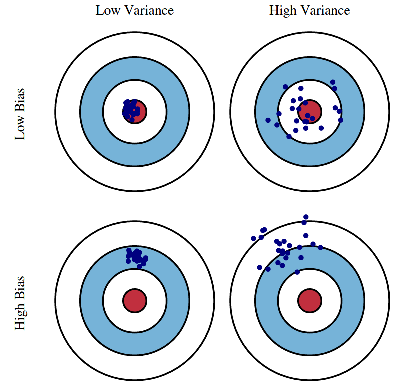

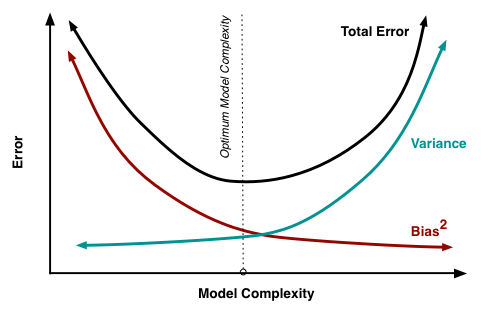

**Preventing ML bias: https://towardsdatascience.com/preventing-machine-learning-bias-d01adfe9f1fa**

**Feature contribution: https://github.com/slundberg/shap**

Types of Biases - https://www.datanami.com/2018/07/18/three-ways-biased-data-can-ruin-your-ml-models/
- Sample Bias (car driving only in day for tests in night)
- Prejudice or Stereotype Bias (males on PC)
- Systematic Value Distortion (instrument error)

### Decision Trees
- Non-parametric supervised method that breaks down a dataset into smaller and smaller subsets. 
- A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g. Hours Played) represents a decision on the numerical target. 
- The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

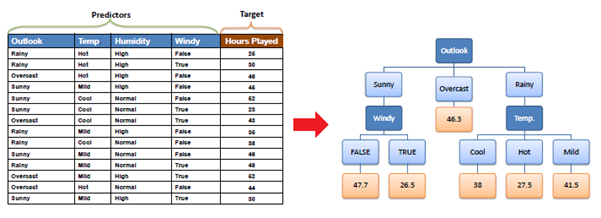

Decisoin trees can be used both for classification and regression. The classification example is the most widespread. The output below shows the decision tree boundaries - they are always parrallel or perpendicular to a respective feature

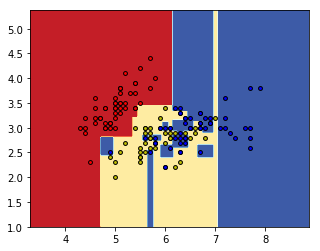

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(5, 4))
pair = [0,1]  # try other pairs as well [0,2]  etc.
X = iris.data[:,pair]
y = iris.target

clf = DecisionTreeClassifier().fit(X, y)  # use graph_viz to see the classification 

plt.subplot(1,1,1)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.show()

Similarly, let's examine the regression case for trees.

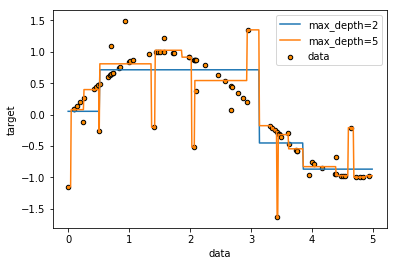

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, label="max_depth=2")
plt.plot(X_test, y_2, label="max_depth=5")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()


- However, notice the impact in a regression when two few levels are chosen, especially for data with large numbers of features. It becomes far too generalizing for the regression
- Furthermore, multi-output problems can also be used

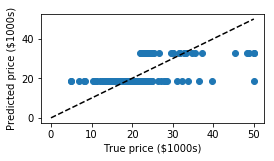

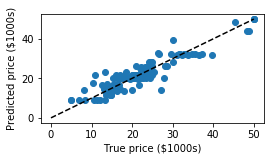

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

# fit two trees, low and high depth 
decreg_ld = DecisionTreeRegressor(max_depth=1)
decreg_ld.fit(X_train, y_train)

decreg_hd = DecisionTreeRegressor(max_depth=6)
decreg_hd.fit(X_train, y_train)


predicted_ld = decreg_ld.predict(X_test)
predicted_hd = decreg_hd.predict(X_test)

plt.figure(figsize=(4, 2))
plt.scatter(y_test, predicted_ld)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()

plt.figure(figsize=(4, 2))
plt.scatter(y_test, predicted_hd)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()


Decision Trees use a variety of algorithms:
1.	ID3 (Iterative Dichotomiser) - uses a top-down, greedy search through the given sets, where each attribute at every tree node is tested to select the attribute that is best for classification. Entropy based 
2.	C4.5 - variant of ID3, better for continuous vars. Uses Entropy based Gain Ratio
3.	CART - binary splitting of the attribute, Gini Index is used as splitting attribute
4.	Other - CHAID, MARS (numerical data), Conditional Inference Trees

***
##### Advantages
- Easy to interpret 
- No feature normalization needed
- Nandle both continuous and categorical data
- Non-parametric and can model nonlinear relationships
- Models interactions between features

##### Disadvantages
- For continuous features tree may become quite large and hence less interpretable (see example)
- Prone to overfit if no stopping criteria or pruning, boosting or bagging etc.
- Overfitting when dataset is wide
- High variance/sensitivity; Small changes in the data lead to completely different tree (examine ensemble methods)
- Sensitive to unbalanced datasets (* when some features instances are denser)
- Split is rectangular, can't split linearly like SVM
- Can't extrapolate regressions to above/below max/min in training data
- Greedy Algorithms are not globally optimum (only locally) 

*Classifiers tend to be optimisitcally biased towards the majority class in unbalanced datasets. Explore under/oversampling/SMOTE*
***

### Ensemble Methods
- Generate multiple hypotheses using the same base learner
- Used primiraliy for striking better bias/varaince
- However, can be less interpretabile and more expensive 

Let's take a look at two keys forms of ensemble methods bagging and boosting

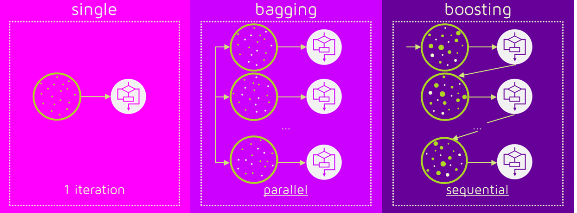

#### Bagging (Bootstrap Aggregation)
- Used when our goal is to reduce the variance of a decision tree. We create several subsets of data from training sample chosen randomly with replacement
- Each collection of subset data is used to train their decision trees
- The result is an ensemble of different trees of which we average the predictions
- Random Forest is an extension over bagging; it also takes a random selection of features to ensure the bias of the error also varies
- RFs are used in multi-class object detection in large-scale real-world computer vision problems. Can be used to model high predictive accuracy for a high-dimensional problem with highly correlated features.
***
##### > Advantages
- Reduces variance of trees
- Handles higher dimensionality - Trees are grown parallely, 
- Handles missing values and maintains accuracy for missing data
- Harder to overfit relative to Boosting

##### > Disadvantages
- May have some increase in bias
- Only mean of models given for regressionelow max/min in training data (and still can't extrapolate)
- Sensitive to unbalanced datasets  
****

#### Boosting 
- This algorithm involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified
- More to reduce bias than variance -> improve upon its base learners with high bias (Naive Bayes classifiers and decisions stumps)
- The residual (error) is corrected sequentially by each model. This however, when exposed to noisy data attempts to overfit
- Great for  anomaly detection

##### > Advantages
- Reduces **bias** and **variance** of trees
- Can use custom loss functions (unlike RFs)

##### > Disadvantages
- Sensitive to noise, overfitting
- More tuning parameters cf. RF

###### Generally, if overfitting is the problem -> Bagging; if biased -> Boosting

Let's examine GBRT on the Boston dataset. Tune the key parameters to examine how the generalization ability of the model performs;
- max_depth = As this increases the individual trees strongly overfit resulting in loss of generalization. Lower figure results in more iterations required (n_estimators)
- max_features = Amount of features to be considered when splitting. Again, control for oversplitting 

The same principles of understanding the parameters and gridsearching them is the only way to tune your model! 

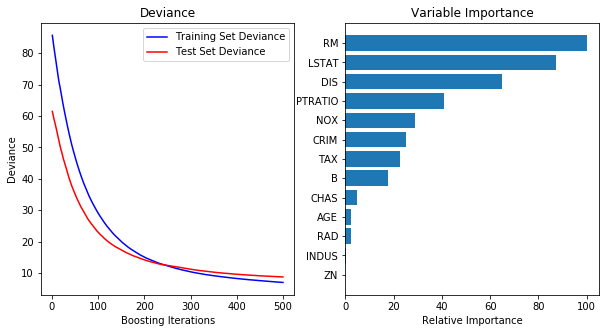

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle

boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=0)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2, 'max_features':10,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

# Plot training deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64) 

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Plot feature importance
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()